# Project for exam

## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('model.csv')

In [3]:
df.shape

(28000, 48)

In [4]:
df.sample(10)

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
8179,457,12,200,0.671958,1.0,0.817391,6,4,1,0,...,0.160000,0.8,-0.700000,-1.000000,-0.400000,0.000000,0.000000,0.500000,0.000000,1100
4970,668,8,358,0.476489,1.0,0.514523,10,4,26,0,...,0.100000,0.5,-0.384722,-0.800000,-0.166667,0.283333,0.266667,0.216667,0.266667,1200
23455,204,12,182,0.619048,1.0,0.666667,18,4,13,1,...,0.100000,1.0,-0.126852,-0.155556,-0.100000,0.000000,0.000000,0.500000,0.000000,617
1307,301,11,291,0.562724,1.0,0.713415,7,1,2,0,...,0.400000,1.0,-0.255000,-0.400000,-0.050000,0.000000,0.000000,0.500000,0.000000,850
20975,146,10,247,0.657025,1.0,0.798658,7,2,1,0,...,0.300000,0.3,-0.381250,-0.500000,-0.125000,0.300000,-0.500000,0.200000,0.500000,8100
3624,606,12,161,0.696203,1.0,0.810000,4,1,0,1,...,0.100000,0.7,-0.295833,-0.500000,-0.187500,0.525000,0.000000,0.025000,0.000000,771
15988,192,11,190,0.679144,1.0,0.830357,3,1,1,0,...,0.100000,0.5,-0.268750,-0.333333,-0.125000,0.300000,-0.316667,0.200000,0.316667,851
9114,201,8,1145,0.399649,1.0,0.578078,20,1,11,1,...,0.100000,1.0,-0.250865,-0.600000,-0.050000,0.000000,0.000000,0.500000,0.000000,4400
10036,604,8,1091,0.475551,1.0,0.689320,5,5,6,0,...,0.100000,1.0,-0.233575,-0.700000,-0.050000,0.000000,0.000000,0.500000,0.000000,531
24100,385,7,351,0.650888,1.0,0.840796,6,3,1,10,...,0.136364,1.0,-0.212500,-0.333333,-0.050000,0.000000,0.000000,0.500000,0.000000,3000


In [5]:
df.isnull().sum()

age_days                         0
 n_tokens_title                  0
 n_tokens_review                 0
 n_unique_tokens                 0
 n_non_stop_words                0
 n_non_stop_unique_tokens        0
 num_hrefs                       0
 num_self_hrefs                  0
 num_imgs                        0
 num_videos                      0
 average_token_length            0
 num_keywords                    0
product_category                 0
 kw_min_min                      0
 kw_max_min                      0
 kw_avg_min                      0
 kw_min_max                      0
 kw_max_max                      0
 kw_avg_max                      0
 kw_min_avg                      0
 kw_max_avg                      0
 kw_avg_avg                      0
 self_reference_min_shares       0
 self_reference_max_shares       0
 self_reference_avg_sharess      0
day                              0
topic_quality                    0
topic_shipping                   0
topic_packaging     

## Split categorical/continuos variables

In [6]:
df.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'day', 'topic_quality', 'topic_shipping',
       'topic_packaging', 'topic_description', 'topic_others',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       

In [7]:
df.dtypes

age_days                           int64
 n_tokens_title                    int64
 n_tokens_review                   int64
 n_unique_tokens                 float64
 n_non_stop_words                float64
 n_non_stop_unique_tokens        float64
 num_hrefs                         int64
 num_self_hrefs                    int64
 num_imgs                          int64
 num_videos                        int64
 average_token_length            float64
 num_keywords                      int64
product_category                  object
 kw_min_min                        int64
 kw_max_min                      float64
 kw_avg_min                      float64
 kw_min_max                        int64
 kw_max_max                        int64
 kw_avg_max                      float64
 kw_min_avg                      float64
 kw_max_avg                      float64
 kw_avg_avg                      float64
 self_reference_min_shares       float64
 self_reference_max_shares       float64
 self_reference_

In [8]:
df_categorical=df[['day', 'product_category']]
df_categorical.head()

,day,product_category
0,tuesday,sport
1,monday,travel
2,thursday,travel
3,tuesday,travel
4,tuesday,tech


In [9]:
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.head()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,0.136364,1.0,-0.180556,-0.25,-0.125,0.50,0.500,0.00,0.500,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0.100000,0.9,-0.318981,-1.00,-0.050,0.05,-0.075,0.45,0.075,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0.050000,0.5,-0.292708,-0.75,-0.100,0.00,0.000,0.50,0.000,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0.136364,0.7,0.000000,0.00,0.000,0.00,0.000,0.50,0.000,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0.100000,1.0,-0.256481,-0.80,-0.050,0.00,0.000,0.50,0.000,1000


## Categorical data

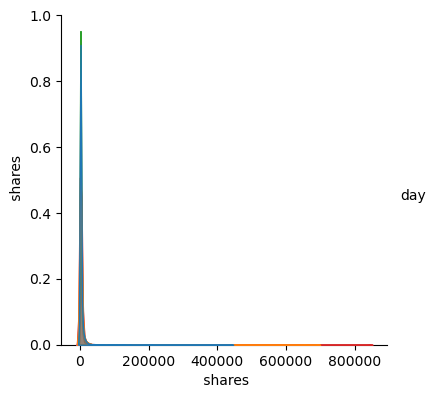

In [10]:
sns.pairplot(data=df[["day"," shares"]], hue="day", height=4)

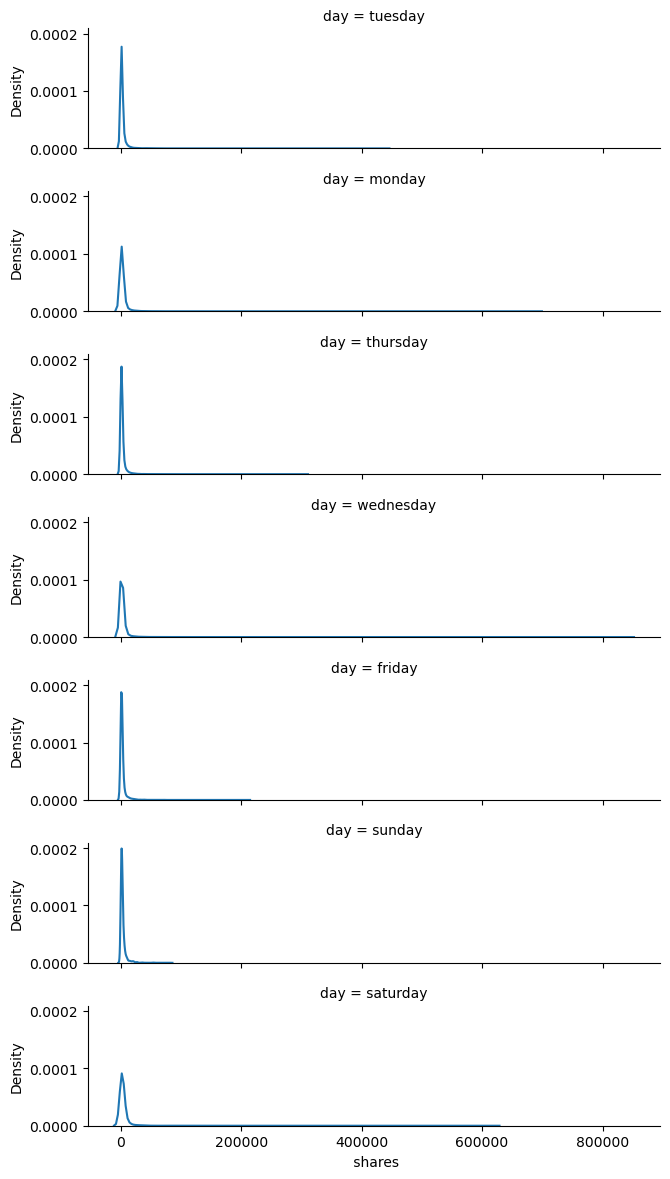

In [11]:
g = sns.FacetGrid(df, row="day", 
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, " shares")

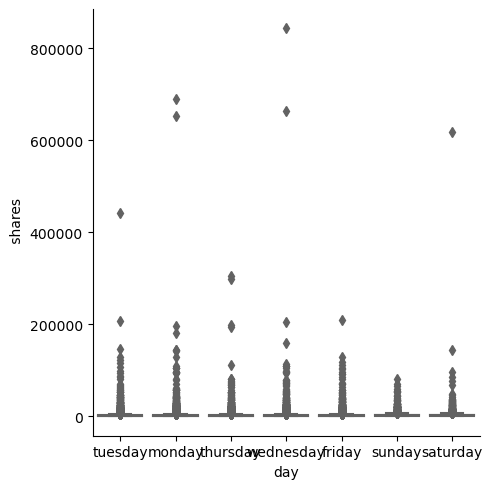

In [12]:
sns.catplot(data=df, x="day", y=" shares",kind="box", palette="Set3")

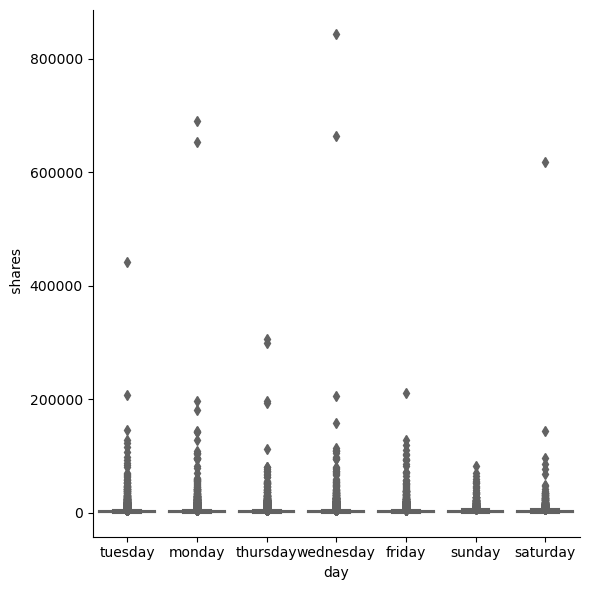

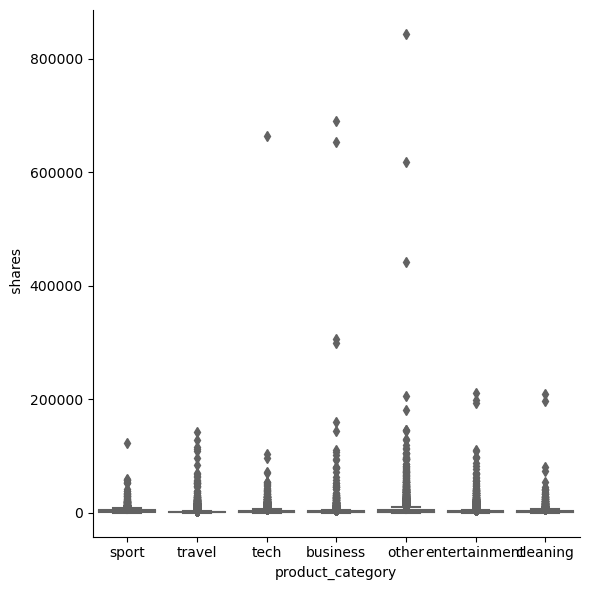

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in df_categorical.columns:
    sns.catplot(data=df, x=i, y=" shares",
            kind="box", palette="Set3",height=6);
plt.show()



In [14]:
dummies = pd.get_dummies(df_categorical.astype(str),drop_first=True) 

dummies.tail()

,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel
27995,0,0,0,0,0,1,0,0,1,0,0,0
27996,0,0,0,0,0,1,0,0,0,0,0,0
27997,0,0,0,0,1,0,0,1,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,1
27999,0,0,0,0,1,0,0,0,0,1,0,0


## Numerical data

array([[<AxesSubplot:title={'center':'age_days'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_review'}>,
        <AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>,
        <AxesSubplot:title={'center':' num_hrefs'}>],
       [<AxesSubplot:title={'center':' num_self_hrefs'}>,
        <AxesSubplot:title={'center':' num_imgs'}>,
        <AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>,
        <AxesSubplot:title={'center':' kw_min_min'}>,
        <AxesSubplot:title={'center':' kw_max_min'}>],
       [<AxesSubplot:title={'center':' kw_avg_min'}>,
        <AxesSubplot:title={'center':' kw_min_max'}>,
        <AxesSubplot:title={'center':' kw_max_max'}>,
        <AxesSubplot:title={'center'

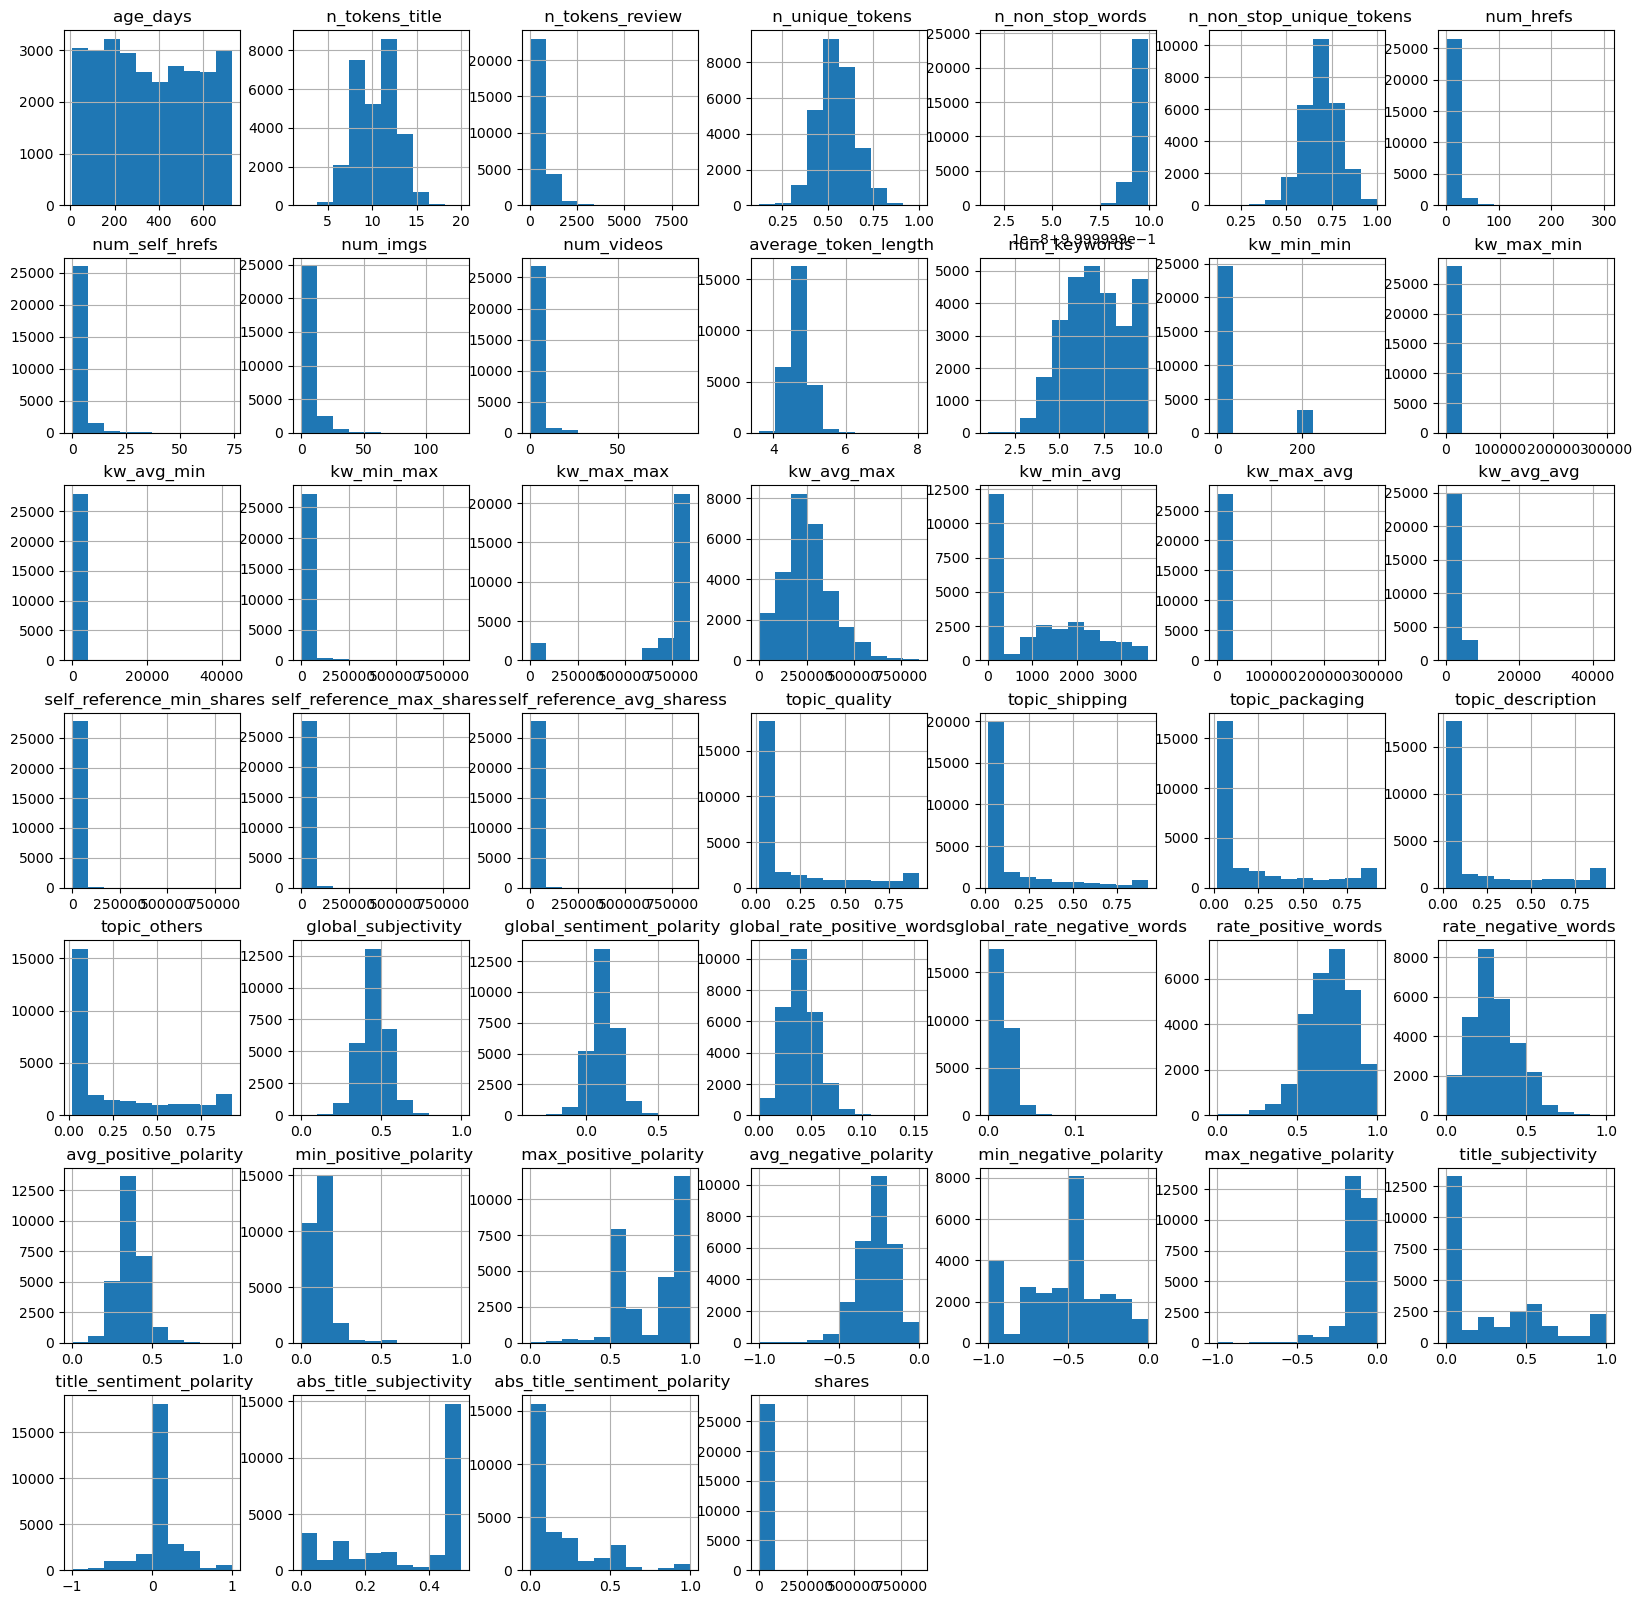

In [15]:
df_numerical.hist(figsize=(20,20))

In [16]:
import math
df_numerical['log_shares']=df_numerical[' shares'].apply(lambda x: math.log(x+1))

array([[<AxesSubplot:title={'center':'age_days'}>,
        <AxesSubplot:title={'center':' n_tokens_title'}>,
        <AxesSubplot:title={'center':' n_tokens_review'}>,
        <AxesSubplot:title={'center':' n_unique_tokens'}>,
        <AxesSubplot:title={'center':' n_non_stop_words'}>,
        <AxesSubplot:title={'center':' n_non_stop_unique_tokens'}>,
        <AxesSubplot:title={'center':' num_hrefs'}>],
       [<AxesSubplot:title={'center':' num_self_hrefs'}>,
        <AxesSubplot:title={'center':' num_imgs'}>,
        <AxesSubplot:title={'center':' num_videos'}>,
        <AxesSubplot:title={'center':' average_token_length'}>,
        <AxesSubplot:title={'center':' num_keywords'}>,
        <AxesSubplot:title={'center':' kw_min_min'}>,
        <AxesSubplot:title={'center':' kw_max_min'}>],
       [<AxesSubplot:title={'center':' kw_avg_min'}>,
        <AxesSubplot:title={'center':' kw_min_max'}>,
        <AxesSubplot:title={'center':' kw_max_max'}>,
        <AxesSubplot:title={'center'

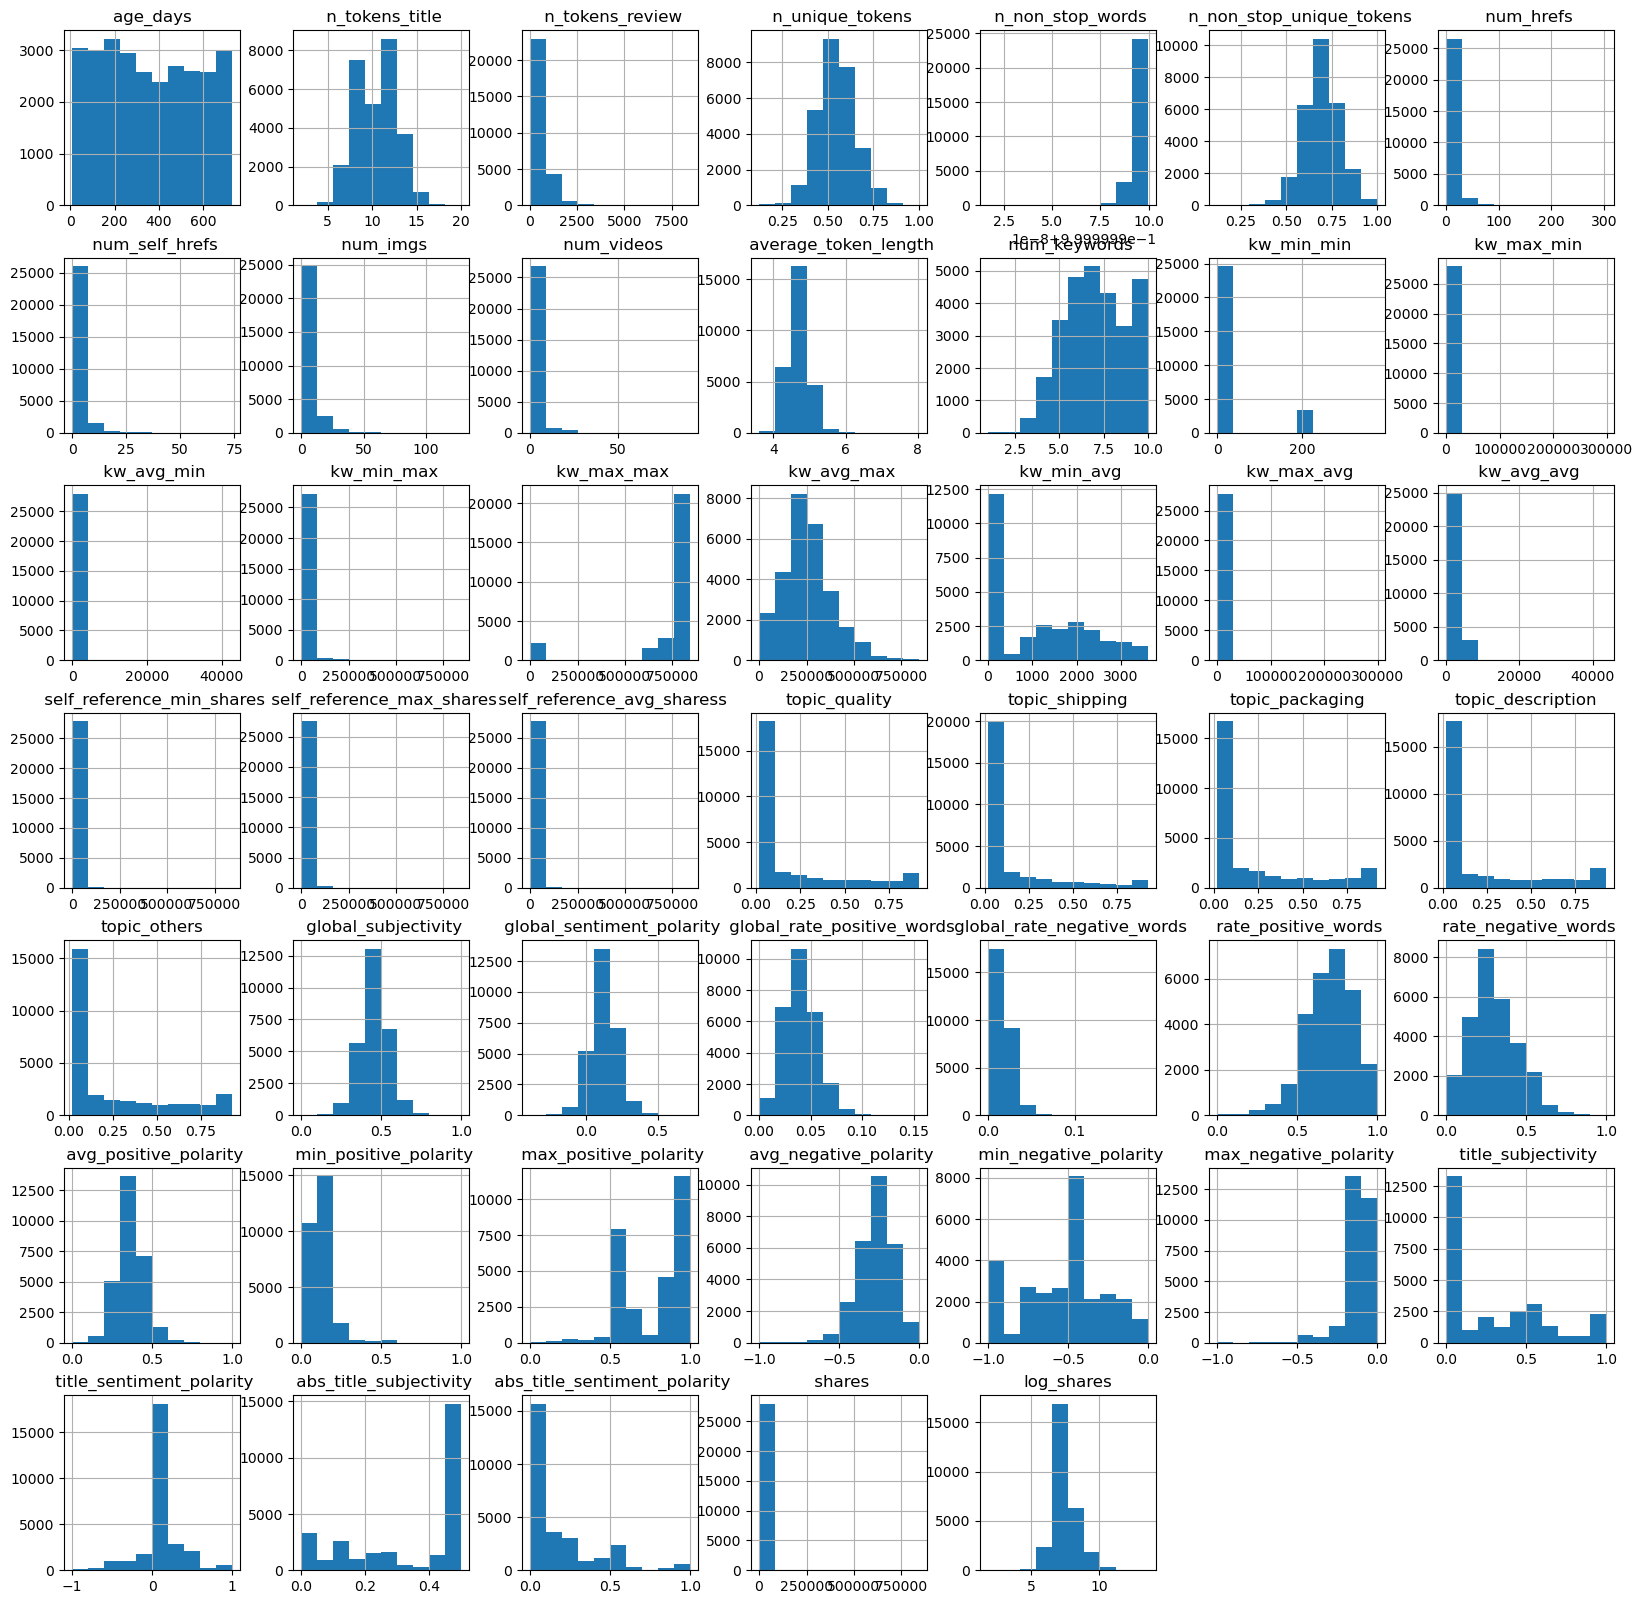

In [17]:
df_numerical.hist(figsize=(20,20))

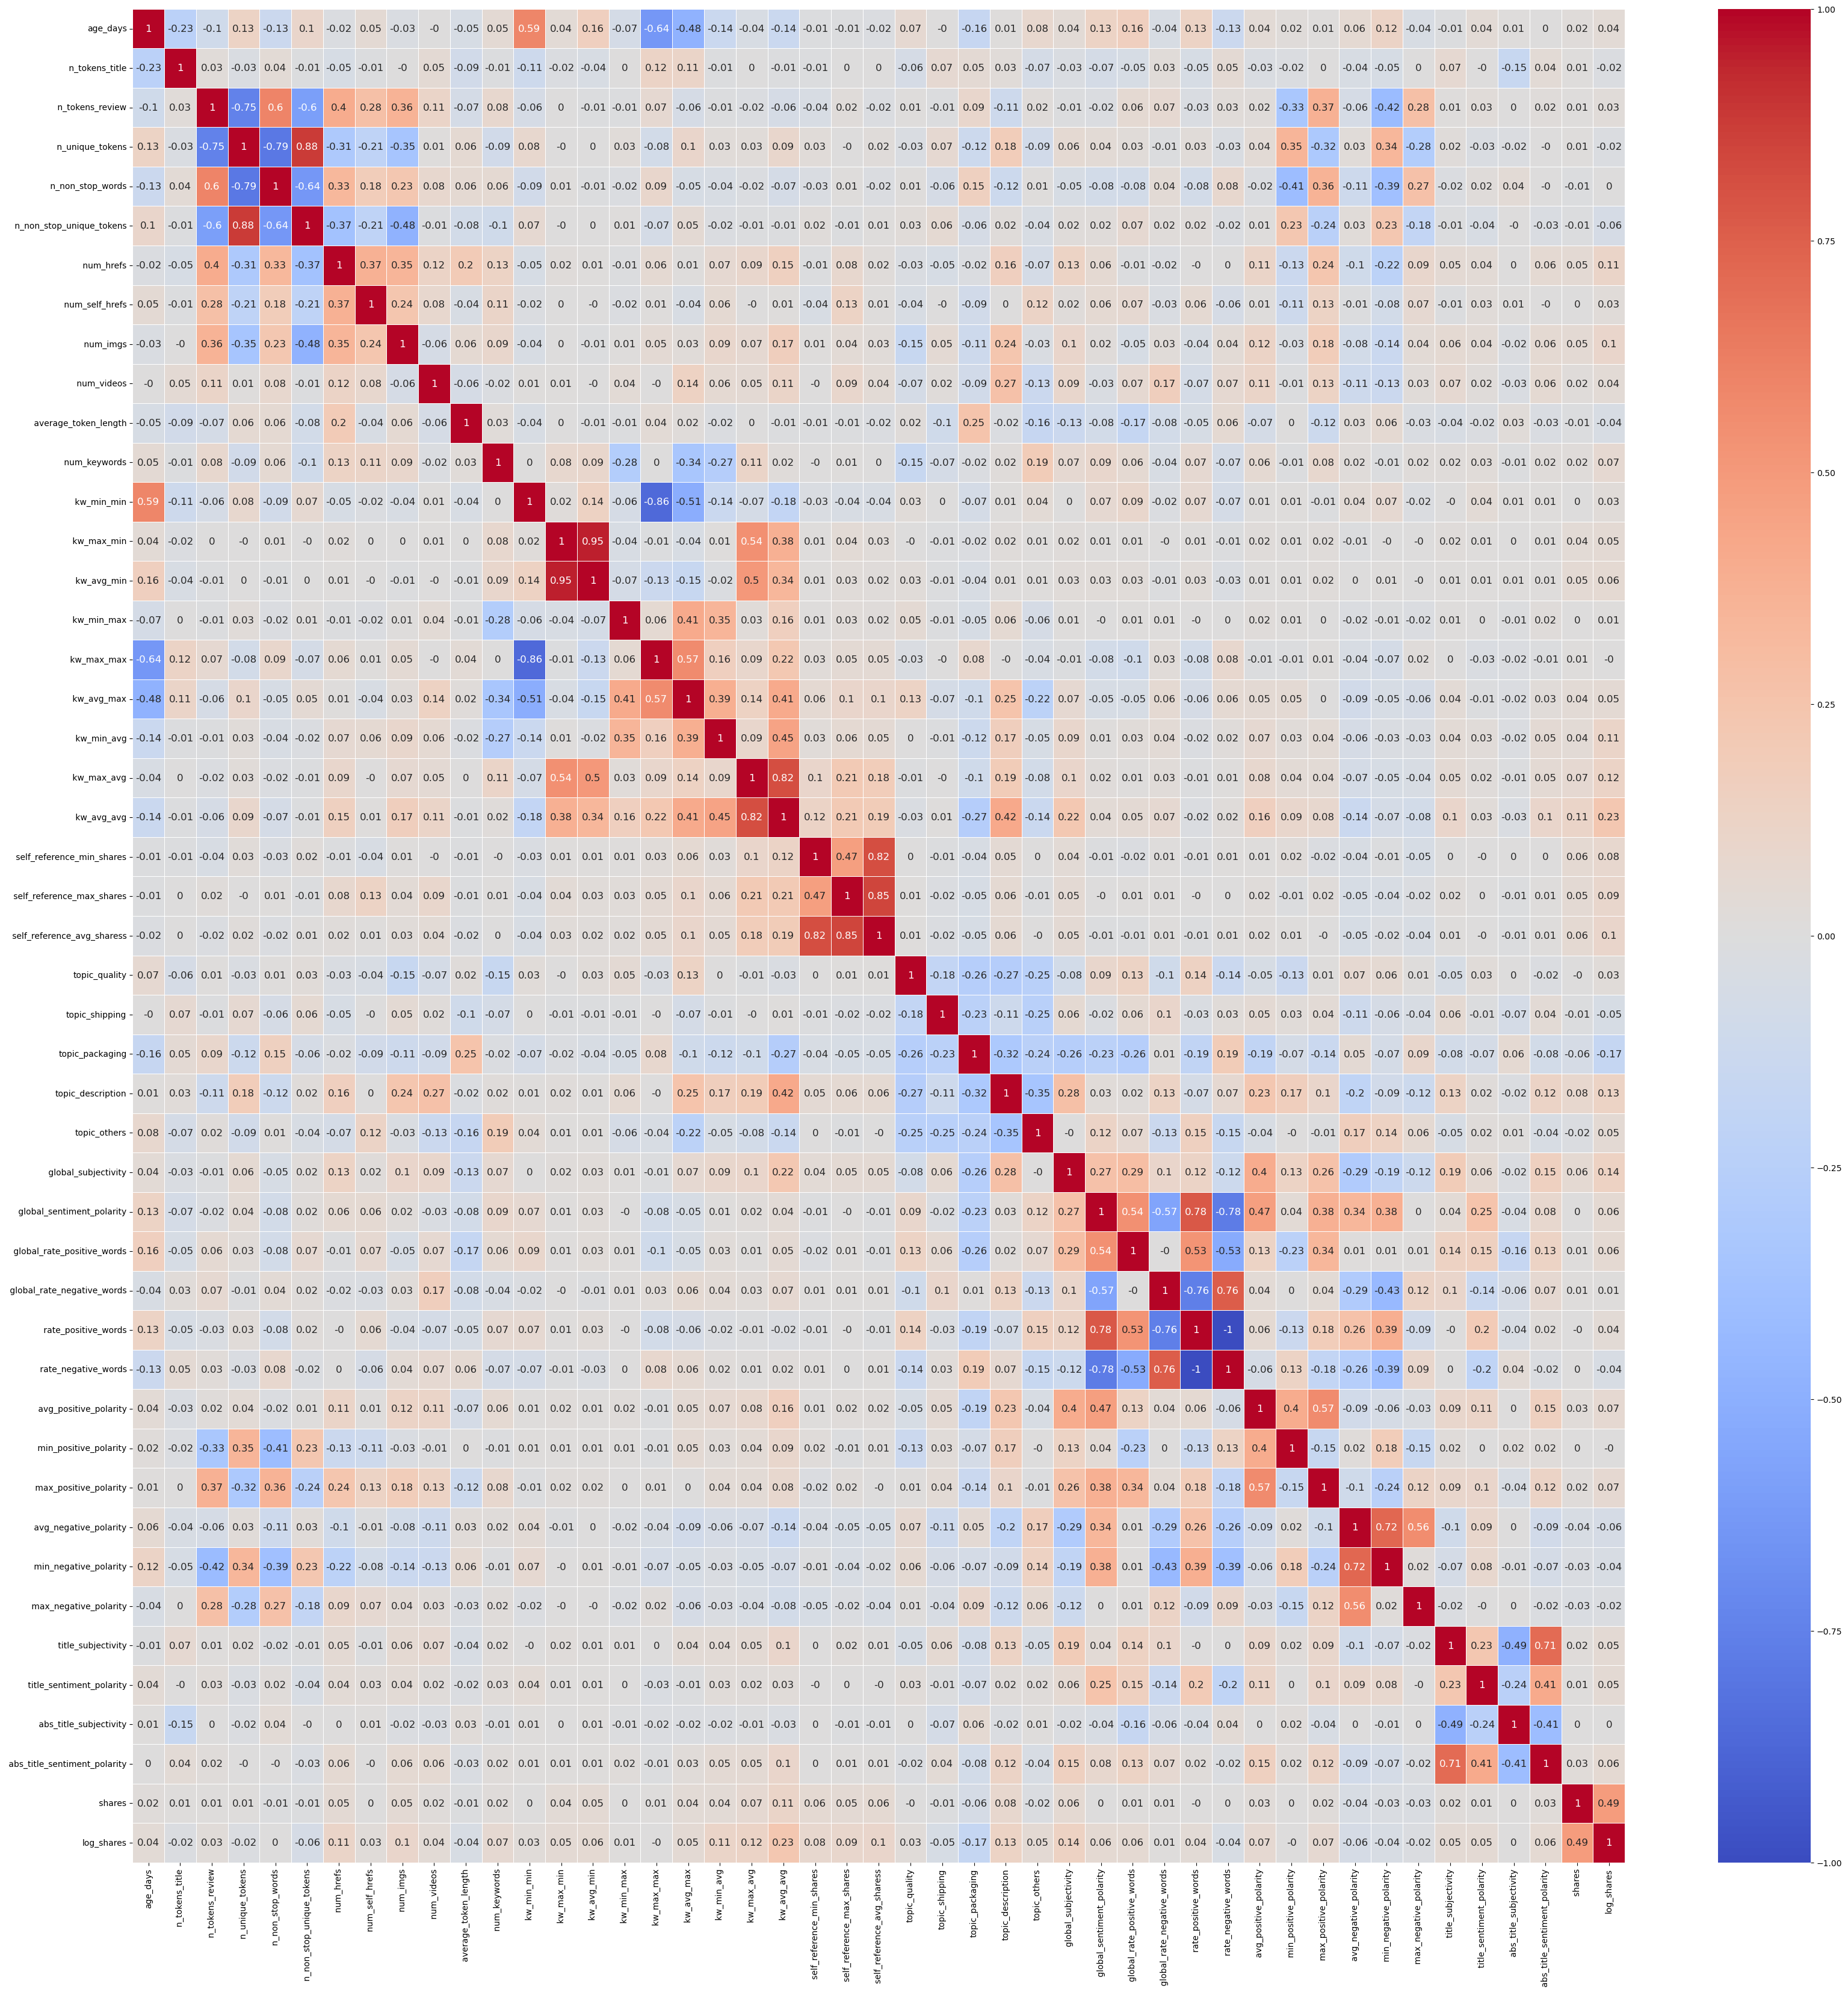

In [18]:
#We can visualise the correlation using a heatmap in Seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (40,40))
sns.heatmap(data=df_numerical.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

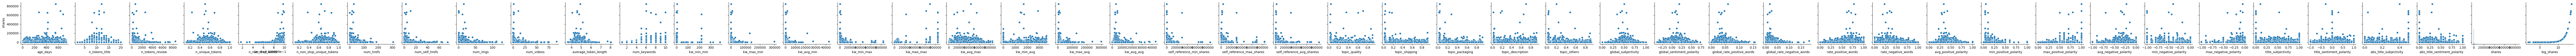

In [19]:
# visualize the relationship between the features and the response using scatterplots
%matplotlib inline
import seaborn as sns
sns.pairplot(df_numerical, x_vars=df_numerical.columns, y_vars=' shares')

In [20]:
X_numerical=df_numerical.iloc[:,:-2]

In [21]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(28000, 12)
(28000, 45)


,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,product_category_tech,product_category_travel
27995,0,0,0,0,0,1,0,0,1,0,0,0
27996,0,0,0,0,0,1,0,0,0,0,0,0
27997,0,0,0,0,1,0,0,1,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,1
27999,0,0,0,0,1,0,0,0,0,1,0,0


In [22]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,day_monday,day_saturday,day_sunday,day_thursday,day_tuesday,day_wednesday,product_category_cleaning,product_category_entertainment,product_category_other,product_category_sport,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
27995,0,0,0,0,0,1,0,0,1,0,...,0.509524,0.200000,1.0,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000
27996,0,0,0,0,0,1,0,0,0,0,...,0.342929,0.100000,0.5,-0.622222,-1.000000,-0.166667,0.454545,0.136364,0.045455,0.136364
27997,0,0,0,0,1,0,0,1,0,0,...,0.422991,0.100000,1.0,-0.404306,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000
27998,0,0,0,0,0,0,0,0,0,0,...,0.308378,0.100000,0.7,-0.288889,-0.900000,-0.100000,0.000000,0.000000,0.500000,0.000000
27999,0,0,0,0,1,0,0,0,0,1,...,0.318747,0.033333,1.0,-0.128770,-0.187500,-0.071429,0.727273,0.068182,0.227273,0.068182


In [23]:
X.columns

Index(['day_monday', 'day_saturday', 'day_sunday', 'day_thursday',
       'day_tuesday', 'day_wednesday', 'product_category_cleaning',
       'product_category_entertainment', 'product_category_other',
       'product_category_sport', 'product_category_tech',
       'product_category_travel', 'age_days', ' n_tokens_title',
       ' n_tokens_review', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' g

### Separate Train/Test sets


In [24]:
y=df[' shares'].apply(lambda x: math.log(x+1))

In [25]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.25, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(21000, 57) (7000, 57)


In [26]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

## Models

In [27]:
from sklearn.model_selection import GridSearchCV
import math

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
    
    y_train_exp=y_train.apply(lambda x: math.exp(x)-1)
    y_test_exp=y_test.apply(lambda x: math.exp(x)-1)
    y_pred_train_exp=np.exp(y_pred_train)-1
    y_pred_test_exp=np.exp(y_pred_test)-1
    
            
    from sklearn import metrics
    print()
    print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
    print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [28]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3732052.504042 using {}

MAE  train 0.638 (2431.725955)  test 0.634 (2369.128275)
MSE  train 0.740              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [29]:
from sklearn.linear_model import Ridge

regressor = Ridge()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.639969 using {'alpha': 0.001}

MAE  train 0.638 (2431.714369)  test 0.634 (2369.133678)
MSE  train 0.740              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [30]:
from sklearn.linear_model import Lasso

regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10]}#, "normalize": [True, False]}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.639987 using {'alpha': 0.001}

MAE  train 0.638 (2430.693708)  test 0.634 (2368.113922)
MSE  train 0.741              test 0.746
RMSE train 0.861              test 0.864
r2   train 0.139              test 0.129


In [31]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(20,50,10),
              'p': [1,2]
            }

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.631867 using {'n_neighbors': 40, 'p': 1}

MAE  train 0.614 (2370.941049)  test 0.624 (2350.440715)
MSE  train 0.716              test 0.758
RMSE train 0.846              test 0.871
r2   train 0.168              test 0.115


In [32]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,18), 
              "min_samples_leaf": np.arange(5,8)}

gs_regression(regressor, parameters)


***GRIDSEARCH RESULTS***
Best score: -0.658876 using {'max_depth': 5, 'min_samples_leaf': 7}

MAE  train 0.644 (2422.254902)  test 0.653 (2418.650292)
MSE  train 0.744              test 0.779
RMSE train 0.862              test 0.882
r2   train 0.136              test 0.091


In [36]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":[10,100,200], "criterion": ['mse'],  # squared_error
              "min_samples_leaf": [10,30], "random_state" : [42]}

gs_regression(regressor, parameters)


/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/jacopobulgarelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


***GRIDSEARCH RESULTS***
Best score: -0.630052 using {'criterion': 'mse', 'min_samples_leaf': 10, 'n_estimators': 200, 'random_state': 42}

MAE  train 0.450 (2019.011294)  test 0.623 (2354.026674)
MSE  train 0.391              test 0.719
RMSE train 0.625              test 0.848
r2   train 0.546              test 0.161


In [ ]:
from sklearn.svm import SVR

regressor = SVR()
parameters = {'C': [0.1,10,1000],
             'epsilon': [0.01,1],
             'gamma':['auto'],
             'kernel': ['linear'], #,'poly'
             'degree': [2,3]
             }

gs_regression(regressor, parameters)

In [ ]:
# This one up here is too slow to run,i'll try the following one that supposely 

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

regressor = SVR()
parameters = {'C': [0.1, 10, 1000],
              'epsilon': [0.01, 1],
              'gamma': ['auto'],
              'kernel': ['linear'],  # ,'poly'
              'degree': [2, 3]
              }

grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, n_jobs=-1)
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data


In [33]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(random_state=0)
parameters = {'hidden_layer_sizes': [(10, 5), (20,10,5)],
              'solver' : ['sgd'],
              'batch_size': [20],
              'learning_rate' : ['constant'],
              'alpha':10.0 ** -np.arange(1, 3),
              'max_iter':[5000]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.632529 using {'alpha': 0.1, 'batch_size': 20, 'hidden_layer_sizes': (20, 10, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'sgd'}

MAE  train 0.605 (2349.913320)  test 0.622 (2350.856135)
MSE  train 0.678              test 0.735
RMSE train 0.824              test 0.857
r2   train 0.212              test 0.143


In [34]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor() # base_estimator=DecisionTreeRegressor(max_depth=3)
parameters = {"n_estimators":[5,10,100,300], "learning_rate":[0.001, 0.1,0.5,1,2], 
              "loss": ['linear', 'square'], "random_state" : [0]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.658813 using {'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100, 'random_state': 0}

MAE  train 0.656 (2440.287674)  test 0.651 (2393.384227)
MSE  train 0.762              test 0.767
RMSE train 0.873              test 0.876
r2   train 0.114              test 0.104


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor() 
parameters = {"n_estimators":[20,50,100], "learning_rate":[0.01, 0.1,1,10], 
              "random_state" : [10] ,
             "max_depth":[1,2]}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -0.630445 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'random_state': 10}

MAE  train 0.622 (2383.784463)  test 0.623 (2349.066206)
MSE  train 0.702              test 0.721
RMSE train 0.838              test 0.849
r2   train 0.184              test 0.158


## Choice of a model

In [ ]:
#retrain in the entire dataset

mlp = MLPRegressor(alpha=0.1, batch_size=20, hidden_layer_sizes=(20,10,5), learning_rate='constant', max_iter=5000, solver='sgd')
mlp.fit(X,y)

In [ ]:
y_pred=mlp.predict(X)
error=y-y_pred


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=8, color="r")
plt.xlim([0,8])
plt.show()

In [42]:
#from sklearn.preprocessing import StandardScaler

#nb_error = np.array(error).flatten()

#error = np.array(error).reshape(-1,1)
#scaled_error= StandardScaler(copy=False).fit(error).transform(error).flatten()

In [ ]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns

#dist = getattr(scipy.stats, 'norm')
#param = dist.fit(error)

err_mean=error.mean()
err_std=error.std()

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
#test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(error))


# plot the distribution and compare with a normal

ax = sns.histplot(error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
#ax.legend() 

#plt.hist(nb_error,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [ ]:
import pickle
pickle.dump(mlp, open('mlp_model.pkl', 'wb'))

## Model Interpretation

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df_X_train=pd.DataFrame(X_train,columns=X.columns)


In [ ]:
!pip install shap

In [ ]:
import shap

X_train_summary = shap.kmeans(X_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(mlp.predict, X_train_summary)
shap_values = explainer.shap_values(df_X_train)
shap.summary_plot(shap_values, df_X_train)

In [ ]:
shap.summary_plot(shap_values, df_X_train, plot_type="bar")

# Making the predictions

In [49]:
df2 = pd.read_csv('bike_sharing_predictions.csv')

In [50]:
df2_categorical=df2[['season', 'mnth', 'hr', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df2_numerical=df2[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

dummies2 = pd.get_dummies(df2_categorical.astype(str),drop_first=True) 
df2_numerical=df2_numerical.drop(["temp"], axis=1)

#scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
#scaled_df2.columns = df2_numerical.columns

X2_numerical=df2_numerical.iloc[:,:-1]
X2=pd.concat([dummies2,X2_numerical], axis = 1)

y2=df2_numerical['cnt'].apply(lambda x: math.log(x+1))

In [51]:
# load model
loaded_model = pickle.load(open('mlp_model.pkl', 'rb'))

#model.fit(X_train,y_train)
# we could retrain with the entire dataset

y2_predictions=loaded_model.predict(X2)

In [52]:
from sklearn import metrics

print("MAE  train %.3f"  % (metrics.mean_absolute_error(y2, y2_predictions)) ) 
print("MSE  train %.3f " % (metrics.mean_squared_error(y2, y2_predictions)) ) 
print("RMSE train %.3f " % (np.sqrt(metrics.mean_squared_error(y2, y2_predictions))) ) 
print("r2   train %.3f " % (metrics.r2_score(y2, y2_predictions)) )


MAE  train 0.224
MSE  train 0.103 
RMSE train 0.321 
r2   train 0.949 


In [53]:
y2_predictions_exp = np.exp(y2_predictions)-1
print(y2_predictions_exp)

[203.91773755 175.21209488 484.85559224 ... 141.11568486 250.15145671
 118.45138076]


In [54]:
np.savetxt("model_predictions.csv", y2_predictions_exp.astype(int), delimiter=",", fmt='%.0f')